# Distributions example -  elections

In [4]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

Note: **some of the code, and ALL of the visual style for the distribution plots below was shamelessly stolen from https://gist.github.com/mattions/6113437/ **.

## Binomial Distribution 

Let us consider a population of coinflips, n of them to be precise, $x_1,x_2,...,x_n$. The distribution of coin flips is the binomial distribution. By this we mean that each coin flip represents a bernoulli random variable (or comes from a bernoulli distribution) with $p=0.5$.

At this point, you might want to ask the question, what is the probability of obtaining $k$ heads in $n$ flips of the coin. We have seen this before, when we flipped 2 coins. What happens when when we flip 3?

(This diagram is taken from the Feynman Lectures on Physics, volume 1. The chapter on probability is http://www.feynmanlectures.caltech.edu/I_06.html)
![3 coin flips](images/3flips.png)

We draw a possibilities diagram like we did with the 2 coin flips, and see that there are different probabilities associated with the events of 0, 1,2, and 3 heads with 1 and 2 heads being the most likely. 
The probability of each of these events is given by the **Binomial Distribution**, the distribution of the number of successes in a sequence of $n$ independent yes/no experiments, or Bernoulli trials, each of which yields success with probability $p$. The Binomial distribution is an extension of the Bernoulli when $n>1$ or the Bernoulli is the a special case of the Binomial when $n=1$.   

$$P(X = k; n, p) = {n\choose k}p^k(1-p)^{n-k} $$

where

$${n\choose k}=\frac{n!}{k!(n-k)!}$$

How did we obtain this? The $p^k(1-p)^{n-k}$ comes simply from multiplying the probabilities for each bernoulli trial; there are $k$ 1's or yes's, and $n-k$ 0's or no's. The ${n\choose k}$ comes from counting the number of ways in which each event happens: this corresponds to counting all the paths that give the same number of heads in the diagram above.

We show the distribution below for 200 trials.

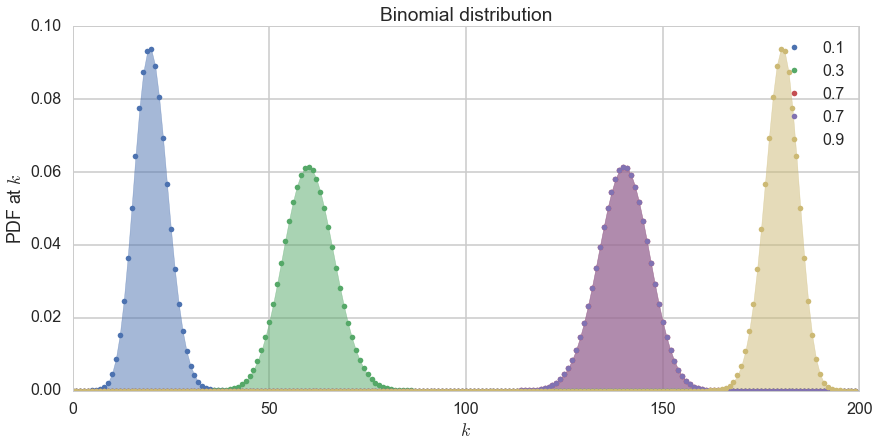

In [12]:
from scipy.stats import binom
plt.figure(figsize=(12,6))
k = np.arange(0, 200)
for p, color in zip([0.1, 0.3, 0.7, 0.7, 0.9], colors):
    rv = binom(200, p)
    plt.plot(k, rv.pmf(k), '.', lw=2, color=color, label=p)
    plt.fill_between(k, rv.pmf(k), color=color, alpha=0.5)
q=plt.legend()
plt.title("Binomial distribution")
plt.tight_layout()
q=plt.ylabel("PDF at $k$")
q=plt.xlabel("$k$")

## Bernoulli Random Variables 

The **Bernoulli Distribution** represents the distribution for coin flips. Let the random variable X represent such a coin flip, where X=1 is heads, and X=0 is tails. Let us further say that the probability of heads is p (p=0.5 is a fair coin). 

We then say:

$$X \sim Bernoulli(p),$$

which is to be read as **X has distribution Bernoulli(p)**. The **probability distribution function (pdf)** or **probability mass function** associated with the Bernoulli distribution is

$$\begin{eqnarray}
P(X = 1) &=& p \\
P(X = 0) &=& 1 - p 
\end{eqnarray}$$

for p in the range 0 to 1. 
The **pmf**, or the probability that random variable $X=x$ may thus be written as 

$$P(X=x) = p^x(1-p)^{1-x}$$

for x in the set {0,1}.

$$E[X] = p $$
$$Var(X) = E[X^2]-(E[X])^2 = p - p^2 = p(1-p)$$

[0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1]


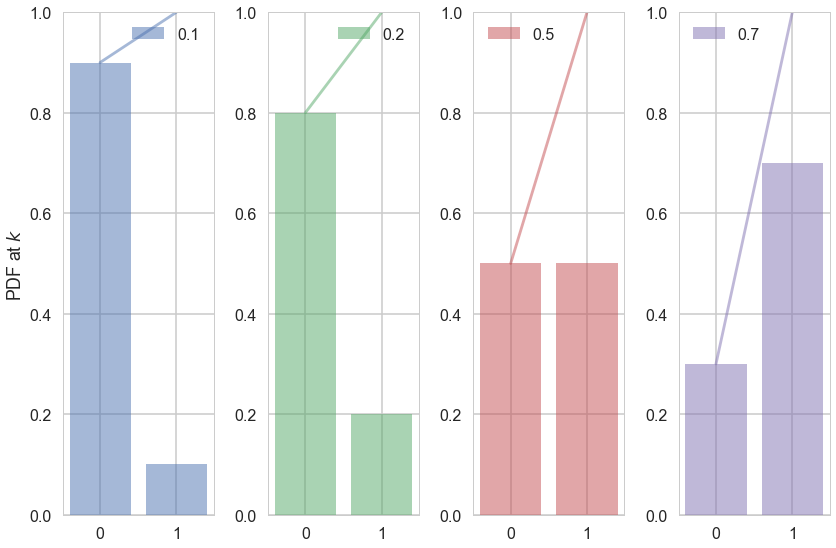

In [38]:
from scipy.stats import bernoulli
#bernoulli random variable
brv=bernoulli(p=0.3)
print(brv.rvs(size=20))
event_space=[0,1]
plt.figure(figsize=(12,8))
colors=sns.color_palette()
for i, p in enumerate([0.1, 0.2, 0.5, 0.7]):
    ax = plt.subplot(1, 4, i+1)
    plt.bar(event_space, bernoulli.pmf(event_space, p), label=p, color=colors[i], alpha=0.5)
    plt.plot(event_space, bernoulli.cdf(event_space, p), color=colors[i], alpha=0.5)

    ax.xaxis.set_ticks(event_space)
   
    plt.ylim((0,1))
    plt.legend(loc=0)
    if i == 0:
        plt.ylabel("PDF at $k$")
plt.tight_layout()

## Binomial Distribution 

Let us consider a population of coinflips, n of them to be precise, $x_1,x_2,...,x_n$. The distribution of coin flips is the binomial distribution. By this we mean that each coin flip represents a bernoulli random variable (or comes from a bernoulli distribution) with $p=0.5$.

At this point, you might want to ask the question, what is the probability of obtaining $k$ heads in $n$ flips of the coin. We have seen this before, when we flipped 2 coins. What happens when when we flip 3?

(This diagram is taken from the Feynman Lectures on Physics, volume 1. The chapter on probability is http://www.feynmanlectures.caltech.edu/I_06.html)
![3 coin flips](images/3flips.png)

We draw a possibilities diagram like we did with the 2 coin flips, and see that there are different probabilities associated with the events of 0, 1,2, and 3 heads with 1 and 2 heads being the most likely. 
The probability of each of these events is given by the **Binomial Distribution**, the distribution of the number of successes in a sequence of $n$ independent yes/no experiments, or Bernoulli trials, each of which yields success with probability $p$. The Binomial distribution is an extension of the Bernoulli when $n>1$ or the Bernoulli is the a special case of the Binomial when $n=1$.   

$$P(X = k; n, p) = {n\choose k}p^k(1-p)^{n-k} $$

where

$${n\choose k}=\frac{n!}{k!(n-k)!}$$

How did we obtain this? The $p^k(1-p)^{n-k}$ comes simply from multiplying the probabilities for each bernoulli trial; there are $k$ 1's or yes's, and $n-k$ 0's or no's. The ${n\choose k}$ comes from counting the number of ways in which each event happens: this corresponds to counting all the paths that give the same number of heads in the diagram above.

We show the distribution below for 200 trials.

## The Normal Distribution

The Normal distribution, also known as the Gaussian after its discoverer Carl Friedrich Gauss who brought the distribution to the world's attention in his work *Theoria Motus Corporum Coelestium in sectionibus conicis solem ambientium* in which he also introduced the Least Squares Estimate, is maybe the most famous and used distribution in statistics.  Most people even if they are unfamiliar with its mathematical properties are familiar with its "bell curve" shape.  As a result of the Central Limit Theorem, the normal distribution ends up being the distribution for

(This diagram is taken from https://learnche.org/pid/univariate-review/normal-distribution-and-checking-for-normality)
![standardized normal](images/normal-distribution-standardized.png)

### Univariate Normal

As is true for all distributions, the univariate (or 1-dimensional) normal can be defined in many ways.  A common way to define it is by means of its probability density:

$$p(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-(x-\mu)^2}{2\sigma^2}} $$

where the mean $\mu\in\mathbb{R}$ and the variance $\sigma^2\gt0$ are parameters of the distribution.  The support of the univariate normal is the entire real line i.e. $x\in\mathbb{R}$.  

The Cumulutive Distribution Function of the Normal Distribution can't be expressed in closed form but can be defined in terms of the error function:

$$ CDF(x) = \frac{1}{2}\left[1 + erf\left(\frac{x - \mu}{\sigma\sqrt{2}}\right)\right] $$

where $erf(x)=\frac{2}{\sqrt\pi}\int_0^ze^{-t^2}dt$.

We say that a random variable $X$ is univariate normal with parameters mean $\mu$ and standard deviation $\sigma$ with the notation  $X \sim N(\mu,\sigma)$.

Generally the univariate normal is a unimodal distribution with a mode or "peak" at $x=\mu$.  The smaller $\sigma$ the sharper the peak.

In the degenerate case of $\sigma^2=0$ the guassian becomes a delta function and the degenerate normal $X \sim N(\mu,0)$ outputs $\mu$ with probability 1 i.e. $X \equiv \mu$.

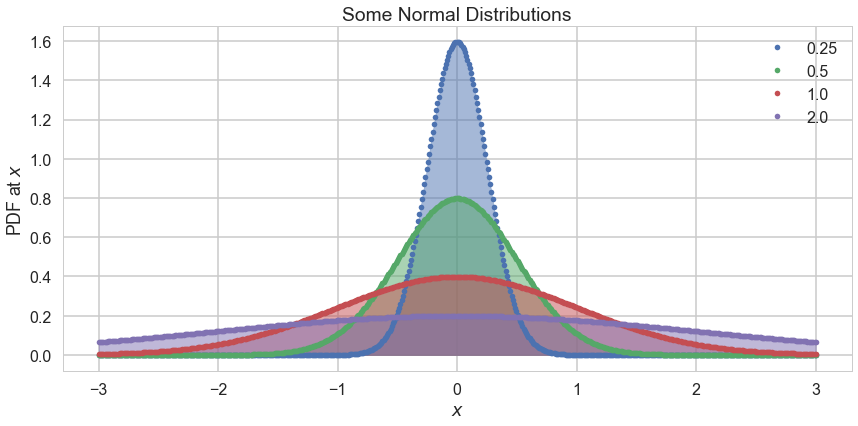

In [61]:
from scipy.stats import norm
plt.figure(figsize=(12,6))
x = np.linspace(-3, 3, 600)
for p, color in zip( [0.25, 0.5, 1.0, 2.0 ], colors):
    plt.plot(x, norm.pdf(x, 0, p), '.', lw=2, color=color, label=p)
    plt.fill_between(x, norm.pdf(x, 0, p), color=color, alpha=0.5)
q=plt.legend()
plt.title("Some Normal Distributions")
plt.tight_layout()
q=plt.ylabel("PDF at $x$")
q=plt.xlabel("$x$")

### Multivariate Normal

#### Definition of the Multivariate Normal

The multi-variate gaussian (or just the Gaussian) can be thought of as an extension of the univariate gaussian to $\mathbb{R^n}$.  Let $\boldsymbol{X} = (X_1, X_2, ..., X_n)$ with mean $\boldsymbol{\mu}=(\mu_1, \mu_2, ..., \mu_n)$ and covariance matrix $\boldsymbol{\Sigma}$ where $\Sigma_{ij}=Cov(X_i,X_j)$ and $\mu_j = E[X_j]$.

**Def**:  We say $\boldsymbol{X}$ is multivariate normal -- that is  $\boldsymbol{X}\sim N(\boldsymbol{\mu},\boldsymbol{\Sigma})$ if and only if $\forall w \in \mathbb{R^n} w^\intercal X \sim N(\mu,\sigma)$ for some values of $\mu$ and $\sigma$.  $\sigma$ may be zero i.e. the univariate normal could be degenerate. 

This definition says that $\boldsymbol{X}$ is a multivariate normal if and only if every vector in $\mathbb{R^n}$ when taken in dot product with $\boldsymbol{X}$ results in a univariate normal distribution.

The multivariate normal can also be degenerate, and we call a multivariate normal degenerate when the determinant of the Covariance matrix is 0 i.e. $\lvert\Sigma\rvert=0$

We can also define the multi-variate normal (from now on we'll just refer to it as the normal, gaussian, or MVN) by other characteristics, including its pdf, but we'll get to that a bit later.  First let's plot an MVN and explore the MVN where all components are independent.

[0, 0]
[0, 1]
[1, 0]
[1, 1]


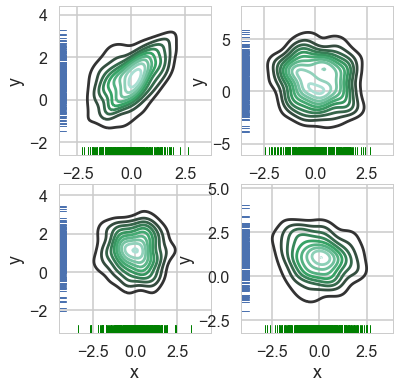

In [53]:
means, covs, data, df = [], [], [], []
means.append([0, 1]), means.append([0,1]), means.append([0, 1]), means.append([0,1])
covs.append([(1, .5), (.5, 1)]), covs.append([(1, 0), (0, 4)])
covs.append([(0, 1), (1, 0)]), covs.append([(1, -.7), (.4, 1)])

for index in range(len(covs)):
    data.append(sp.stats.multivariate_normal.rvs(means[index], covs[index], 300))
    df.append(pd.DataFrame(data=data[index], columns=["x", "y"]))
    
getindex = lambda y: [int(x) for x in str(bin(y)[2:].zfill(2))]

f, ax = plt.subplots(figsize=(6,6), ncols=2, nrows=2)
for i in range(4):
    
    indices = getindex(i)
    sns.kdeplot(df[i].x, df[i].y, ax=ax[indices[0]][indices[1]])
    sns.rugplot(df[i].x, color="g", ax=ax[indices[0]][indices[1]])
    sns.rugplot(df[i].y, vertical=True, ax=ax[indices[0]][indices[1]])

#### MVN with Independent  Components

If the components $X_i$ of the MVN $\boldsymbol{X}$  are independent, we can gain an intuition for the pdf, etc. without having to have any special insight into MVNs. By our definition we know that the components $X_i$ have to be univariate normal since setting the vector $w$ in our definition such that $w_j^\intercal = \delta(i,j)$ (with $\delta(i,j)$ being the dirac delta function which has value 1 when j = i and 0 for all other values of j) means that $X_i$ has to be a univariate gaussian.

For the case that all the $X_i$ are independent and thus independent normals then knowing the pdf of the univariate normal and taking advantage of the separability qualities for pdfs of independent random variables gives the following.

For each $x_i$

$$p(x_i; \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma_i^2}}e^{\frac{-(x_i-\mu_i)^2}{2\sigma_i^2}} $$

So jointly:

$$p(x; \mu, \sigma)= p(x_1; \mu, \sigma)\ldots p(x_1; \mu, \sigma) $$

$$= \frac{1}{\sqrt{2\pi\sigma_1^2}}e^{\frac{-(x_1-\mu_1)^2}{2\sigma_1^2}} \ldots \frac{1}{\sqrt{2\pi\sigma_n^2}}e^{\frac{-(x_n-\mu_n)^2}{2\sigma_n^2}}$$

Doing a little bit of regrouping gives:

$$p(x_i; \mu, \sigma) = \frac{1}{\sqrt{(2\pi)^n\prod_i\sigma_i^2}}e^{\sum_i{\frac{-(x_i-\mu_i)^2}{2\sigma_i^2}}} $$

Now let's consider a few characteristics of the joint random variable $\boldsymbol{X}$.  

First of all, since the $X_i$ are independent, 
$$\boldsymbol{\Sigma_{ij}} = \left\{
	\begin{array}{ll}
		\sigma_i^2  & \mbox{if } i = j \\
		0 & \mbox{if } i \neq j
	\end{array}
\right.$$

$$\boldsymbol{2\pi\Sigma_{ij}} = \left\{
	\begin{array}{ll}
		2\pi\sigma_i^2  & \mbox{if } i = j \\
		0 & \mbox{if } i \neq j
	\end{array}
\right.$$

So $\boldsymbol{\Sigma^{-1}}$ will be an n=n matrix with $\frac{1}{\sigma^2_{ij}}$ along the diagonal. If we matrix multiply $\boldsymbol{\Sigma^{-1}}$ and the vector $\boldsymbol{x}-\boldsymbol{\mu}$ the product will be

$$\boldsymbol{\Sigma^{-1}}(\boldsymbol{x}-\boldsymbol{\mu}) = \left(
	\begin{array}{5l}
		\frac{x_1 - \mu_1}{\sigma_1^2} \\
        \ldots \\
		\frac{x_i - \mu_i}{\sigma_i^2} \\
        \ldots \\
        \frac{x_n - \mu_n}{\sigma_n^2} \\
	\end{array}
\right).$$

Taking the dot product between $\boldsymbol{x} - \mu$ and $\Sigma^{-1}(\boldsymbol{x}-\boldsymbol{\mu})$ which we can write as $(\boldsymbol{x}  - \mu)^\intercal\Sigma^{-1}(\boldsymbol{x}-\boldsymbol{\mu})$ gives us 

$$ (\boldsymbol{x}  - \mu)^\intercal\Sigma^{-1}(\boldsymbol{x}-\boldsymbol{\mu}) = \sum_i{\frac{(x_i-\mu_i)^2}{\sigma_i^2}}$$

Finally noting that the determinate of a diagonal matrix is just the product of its diagonal elements we can see that 

$$det(\boldsymbol{2\pi\Sigma}) = \lvert\boldsymbol{2\pi\Sigma}\rvert = (2\pi)^n\prod_i\sigma_i^2$$

Taking all of this together, we can write the pdf for the MVN with independent components as

$$p(x; \mu, \sigma) = \frac{1}{\lvert\boldsymbol{2\pi\Sigma}\rvert}e^{-\frac{1}{2}(\boldsymbol{x}  - \mu)^\intercal\Sigma^{-1}(\boldsymbol{x}-\boldsymbol{\mu})} $$

While it wasn't necessary to use this form for the pdf in this case of independent components, we'll see that this form is very useful for the general case.  Before we move on to the general case, let's mention a few facts.

**Fact: The joint distribution for a random variable with independent univariate gaussian components is MVN.**

We won't give a formal proof here, but you can take advantage of two characteristics of the univariate normal to demonstrate this fact.  The first is that a univariate normal multiplied by a scalar is also a univariate normal.  Second, the sum of independent univariate normals is univariate normal (whose mean is the sum of the individual means and whose variance is the sum of the variances).  The second characteristic can be shown using the moment generating function or the characteristic function of individual independent univariate normals.  The dot product of any vector in $\mathbb{R^n}$ with our random variable $\boldsymbol{X}$ will be a sum of scaled independent univariate random variables and thus a univariate random variable itself.  By our original definition, $\boldsymbol{X}$ is MVN.


**Fact: If the marginal distributions of a MVN have correlation 0, then the marginal (or component) random variables are independent.**

We also won't give a formal proof here but when we give the pdf of an MVN when dealing with the general case, it will be clear that the pdf will be separable if the $X_i$ have no correlation and thus the $X_i$ will be independent.  This is a special characteristic of the MVN.  It is not the case generally of multivariate distributions that 0 correlations among the marginals mean that those marginal random variables are independent. 



#### The General Multivariate Normal and its PDF

Let $X_i\sim N(\mu_i, \sigma_i)$ and $\boldsymbol{X} = (X_1, X_2, ..., X_n)$ where $X_i\sim N(\mu_i, \sigma_i)$ with mean $\boldsymbol{\mu}=(\mu_1, \mu_2, ..., \mu_n)$ and covariance matrix $\boldsymbol{\Sigma}$ where $\Sigma_{ij}=Cov(X_i,X_j)$ and $\mu_j = E[X_j]$.  Let $\lvert\Sigma\rvert \neq 0$ (i.e. the covariance matrix is non-singular).

**Def**:  We say $\boldsymbol{X}$ is multivariate normal -- that is  $\boldsymbol{X}\sim N(\boldsymbol{\mu},\boldsymbol{\Sigma})$ if 

$$p(x; \mu, \sigma) = \frac{1}{\lvert\boldsymbol{2\pi\Sigma}\rvert}e^{-\frac{1}{2}(\boldsymbol{x}  - \mu)^\intercal\Sigma^{-1}(\boldsymbol{x}-\boldsymbol{\mu})} $$


We state the definition of the pdf here (although we motiviated in the last section).  We can prove the equivalence between our two definitions of MVN by using the characteristic function, but won't do so here.

A few remarks:

The covariance matrix $\boldsymbol{\Sigma}$ is symmetric by definition since $\Sigma_{ij}=Cov(X_i,X_j) =Cov(X_j,X_i)= \Sigma_{ji} $

Because covariance matrix $\boldsymbol{\Sigma}$ is symmetric and all elements are non-negative and real, then  $\boldsymbol{\Sigma}$ is positive semi-definite by the spectral theorem.

That means there are matrices $Q$ and $Q^{-1}$ s.t. $\boldsymbol{\Sigma} = Q \Lambda Q^{-1}$ with $\Lambda$ diagonal and non-negative.

Because of the diagonalization of $\boldsymbol{\Sigma}$ given to us by the spectral theorem and the pdf for the MVN with independent marginals we developed in the last section -- we can now use the matrices $Q$ and $Q^{-1}$ in a change of basis operation to show that the pdf above is the pdf for the genereal MVN without using the characteristic function of moment generating function.

$\mu$ and $\boldsymbol{\Sigma}$ completely determine the MVN.



#### Affine Transformations

An **affine transformation** of the n-dimensional vector $X$ is a linear transformation $AX + b$ where $A$ is an nxn matrix and $b$ is an nx1 vector.

**Fact**:  An affine transformation of a MVN random variable is also a MVN random variable.  That is to say if $\boldsymbol{X}$ is a MVN random variable with mean $\mu$ and covariance $\boldsymbol{\Sigma}$ and $AX + b$ is an affine transformation, then $AX + b$ is a MVN random  variable $\boldsymbol{Y}$ with mean $\mu^* = A\mu + b$ and covariance matrix $\boldsymbol{\Sigma^*}= A\boldsymbol{\Sigma}A^\intercal$

First of all $A\in\mathbb{R^{mxn}}$ and $b\in\mathbb{R^{m}}$ with $m \leq n$

The affine property follows pretty quickly from our original definition of an MVN. Since A is an mxn matrix, $Y_i = A_i^\intercal X + b_i$.  Since $A_i\in\mathbb{R^n}$ by our original definition Y_i is univariate gaussian (the translation by $b_i$ doens't affect the distribution) with $\mu_i = A_i^\intercal \mu + b_i$.  This shows that $\boldsymbol{\mu^*} = (\mu^*_1, \mu^*_2, \ldots \mu^*_n) = A\mu + b$.  $\boldsymbol{\Sigma^*}= A\boldsymbol{\Sigma}A^\intercal$ follows from the properties of covariance.  So we know that $\boldsymbol{Y}$ is a random variable with univariate gaussian components and the right mean and covariance matrix.  How do we know it's an MVN?  Well let's consider our definition from the first pick a vector $w$ in $\mathbb{R^m}$. Then  $w^\intercal Y =w^\intercal (AX) = (w^\intercal A)X $.  Let's define  $\omega^\intercal\equiv(w^\intercal A) $. It's clear that $\omega\in\mathbb{R^n}$ since $w^\intercal$ is a 1xm vector and A is an mxn matrix making $\omega^\intercal$ a 1xn vector. So from our original definition and the status of $\boldsymbol{X}$ as an MVN, then (w^\intercal A)X is a univariate Gaussian meaning $\boldsymbol{Y}$ is also an MVN.

We now have a way to construct any MVN from independent standard univariate Gaussians using the affine transformation.

**Fact**: Consider $X_i\sim N(0,1)$.  Let $\boldsymbol{X}$ = $X_1,X_2,\ldots,X_n \sim N(0,\boldsymbol{I})$.  $A\boldsymbol{X} + b \sim N(\mu, \boldsymbol{\Sigma})$ where $\boldsymbol{\Sigma}=AA^\intercal$.

All we need to show the above is affine transformation property on MVNs and the status of 
$\boldsymbol{\Sigma}$ being positive semi-definite.

#### Marginal Distributions of the MVN

One of the reasons we defined the MVN using our original definition (and not via the pdf or the characteristic function) is that (as we've seen e.g. affine transformation) other powerful properties can be shown fairly easily and elegantly.  One of these properties is the following fact about the marginals of an MVN.

**Fact**:  Given an MVN $\boldsymbol{X}$ any of its marginals are also Gaussian.

Since a marginal on a distribution is a projection of that distribution onto a subspace, and given that any vector let's say for instance $\omega$ in that subspace is a vector in $\mathbb{R^{n}}$ then $\omega \cdot \boldsymbol{X} = \omega^\intercal\boldsymbol{X}\sim N(\mu^*,\sigma^*)$.  Where $N(\mu^*,\sigma^*)$ is a univariate normal so the marginals are Gaussian. 